<a href="https://colab.research.google.com/github/JinHyun-P/HelloGit/blob/master/n133a_high_dimensional_data_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 3 / NOTE 3*

# 📝 Assignment



## 1. 주어진 matrix에 대해서, numpy를 사용하여, `eigenvalue`와 `eigenvector`를 구하세요.

\begin{bmatrix} 4 & 2 \\ 2 & 4 \end{bmatrix}

In [37]:
import numpy as np
import pandas as pd
from numpy import array
from numpy import mean
from numpy import std
from numpy import cov
from numpy.linalg import eig

In [9]:
a = np.array([[4, 2],
              [2, 4]])

In [10]:

print("Data: \n", a)
means = mean(a.T, axis=1)
print("\n Means: \n", means)
centered_data = a - means
print("\n Centered Data: \n", centered_data)
std_devs = std(a.T, axis=1)
print('\n Standard Deviations: \n', std_devs)
standardized_data = centered_data / std_devs
print("\n Standardized Data: \n", standardized_data)
covariance_matrix = cov(standardized_data.T)
print("\n Covariance Matrix: \n", covariance_matrix)
values, vectors = eig(covariance_matrix)
print("\n Eigenvectors: \n", vectors)
print("\n Eigenvalues: \n", values)
P = vectors.T.dot(standardized_data.T)
print("\n Projected Data: \n", P.T)

Data: 
 [[4 2]
 [2 4]]

 Means: 
 [3. 3.]

 Centered Data: 
 [[ 1. -1.]
 [-1.  1.]]

 Standard Deviations: 
 [1. 1.]

 Standardized Data: 
 [[ 1. -1.]
 [-1.  1.]]

 Covariance Matrix: 
 [[ 2. -2.]
 [-2.  2.]]

 Eigenvectors: 
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]

 Eigenvalues: 
 [4.0000000e+00 4.4408921e-16]

 Projected Data: 
 [[ 1.41421356e+00 -2.22044605e-16]
 [-1.41421356e+00  2.22044605e-16]]


## 2. penguins dataset을 사용하여 numerical feature 6개에 대해서 pca를 시행, 이후 pc1-pc2를 사용하여 scatter plot을 그리세요.

<img src='https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/lter_penguins.png' width = 450>

- [Palmer-penguins](https://github.com/allisonhorst/palmerpenguins) 

데이터셋 사용을 위해, 다음 링크를 참조하세요.

<http://seaborn.pydata.org/generated/seaborn.load_dataset.html#seaborn.load_dataset>



In [11]:
import seaborn as sns
from matplotlib import pyplot as plt

In [12]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [34]:
n_penguin = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
n_penguin.isnull().sum()

bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
dtype: int64

In [35]:
n_penguin = n_penguin.dropna()

In [42]:
n_penguin

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [47]:
from numpy import array
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()

Z = scaler.fit_transform(n_penguin)
print("\n Standardized Data: \n", Z)

pca = PCA(2)

pca.fit(Z)

print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)

B = pca.transform(Z)
print("\n Projected Data: \n", B)


 Standardized Data: 
 [[-0.88449874  0.78544923 -1.41834665 -0.56414208]
 [-0.81112573  0.1261879  -1.06225022 -0.50170305]
 [-0.66437972  0.43046236 -0.42127665 -1.18853234]
 ...
 [ 1.18828874 -0.73592307  1.50164406  1.93341896]
 [ 0.23443963 -1.19233476  0.7894512   1.24658968]
 [ 1.09657248 -0.53307343  0.86067049  1.49634578]]

 Eigenvectors: 
 [[ 0.45525033 -0.40033468  0.57601332  0.54835019]
 [ 0.59703114  0.79776657  0.0022822   0.08436292]]

 Eigenvalues: 
 [2.76183065 0.7747822 ]

 Projected Data: 
 [[-1.84344489e+00  4.77022173e-02]
 [-1.30676189e+00 -4.28348241e-01]
 [-1.36918099e+00 -1.54476399e-01]
 [-1.87882665e+00 -2.04840660e-03]
 [-1.91174773e+00  8.29209600e-01]
 [-1.76302514e+00 -3.51479604e-01]
 [-8.10074586e-01  5.22488676e-01]
 [-1.83520425e+00 -7.69633435e-01]
 [-1.19420773e+00  1.02628371e+00]
 [-1.73020372e+00 -7.88568999e-01]
 [-1.74303952e+00 -6.66490580e-01]
 [-1.78870787e+00 -2.36071635e-01]
 [-1.94827614e+00  1.01125430e+00]
 [-1.56398084e+00  5.9708614

In [48]:
pc12 = pd.DataFrame(data = B, columns = ['pc1', 'pc2'])
pc12.head()

,pc1,pc2
0,-1.843445,0.047702
1,-1.306762,-0.428348
2,-1.369181,-0.154476
3,-1.878827,-0.002048
4,-1.911748,0.829210


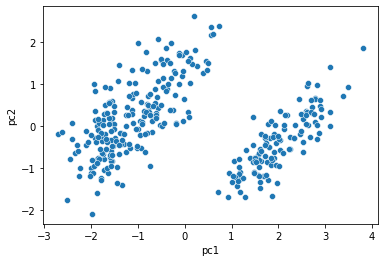

In [65]:
sns.scatterplot(data = pc12, x = 'pc1', y = 'pc2')

## 🔥 도전 과제

모두 하면 됩니다.

### 1.  "One-hot-encoding"을 이용하여 categorical 데이터를 numerical 하게 변환시켜서 PCA를 다시 시행해보세요.

### 2. "Scree Plot" 에 대해서 알아보고, 위에서 PCA로 만든 데이터셋을 사용하여 만들어보세요. 90%의 내용을 설명하기 위해서, 몇개의 PC를 사용해야 하나요?


In [60]:
c_penguin = df[['species', 'island', 'sex']]

In [61]:
c_penguin = c_penguin.dropna()

In [63]:
oh_penguin = pd.get_dummies(c_penguin)

In [64]:
from numpy import array
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()

Z = scaler.fit_transform(oh_penguin)
print("\n Standardized Data: \n", Z)

pca = PCA(2)

pca.fit(Z)

print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)

B = pca.transform(Z)
print("\n Projected Data: \n", B)


 Standardized Data: 
 [[ 1.13173403 -0.50656073 -0.74570421 ...  2.46680084 -0.99103121
   0.99103121]
 [ 1.13173403 -0.50656073 -0.74570421 ...  2.46680084  1.00904996
  -1.00904996]
 [ 1.13173403 -0.50656073 -0.74570421 ...  2.46680084  1.00904996
  -1.00904996]
 ...
 [-0.88359983 -0.50656073  1.34101429 ... -0.40538335 -0.99103121
   0.99103121]
 [-0.88359983 -0.50656073  1.34101429 ... -0.40538335  1.00904996
  -1.00904996]
 [-0.88359983 -0.50656073  1.34101429 ... -0.40538335 -0.99103121
   0.99103121]]

 Eigenvectors: 
 [[-0.23655517 -0.33939073  0.53042814  0.55293334 -0.46983658 -0.14259373
  -0.01853241  0.01853241]
 [ 0.51540419 -0.44683831 -0.15778175 -0.02731673 -0.31544179  0.47649047
   0.30208117 -0.30208117]]

 Eigenvalues: 
 [2.92581398 2.03876048]

 Projected Data: 
 [[-0.9882105   1.77213531]
 [-1.06234316  2.98050904]
 [-1.06234316  2.98050904]
 [-1.06234316  2.98050904]
 [-0.9882105   1.77213531]
 [-1.06234316  2.98050904]
 [-0.9882105   1.77213531]
 [-1.06234316 